# Introduction to Data Visualization with matplotlib

In [1]:
# Setup header
import calendar
import matplotlib.pyplot as plt
import pandas as pd

austin_weather = pd.read_csv('austin_weather.csv')
climate_change = pd.read_csv('climate_change.csv', parse_dates=True, index_col='date')
seattle_weather = pd.read_csv('seattle_weather.csv')

austin_weather['MONTH'] = austin_weather['DATE'].map(lambda x: calendar.month_abbr[x])
seattle_weather['MONTH'] = seattle_weather['DATE'].map(lambda x: calendar.month_abbr[x])
seattle_weather = seattle_weather[seattle_weather['NAME'] == 'SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US']

## Introduction to matplotlib

### Using the `matplotlib.pyplot` interface

The lesson starts off with a sort of "hello world" with a blank plot:

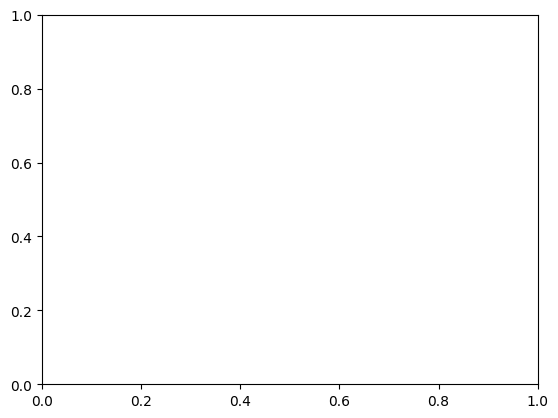

In [2]:
fig, ax = plt.subplots()

The lesson then advances fairly quickly by showing us how to plot two line plots in the same figure:

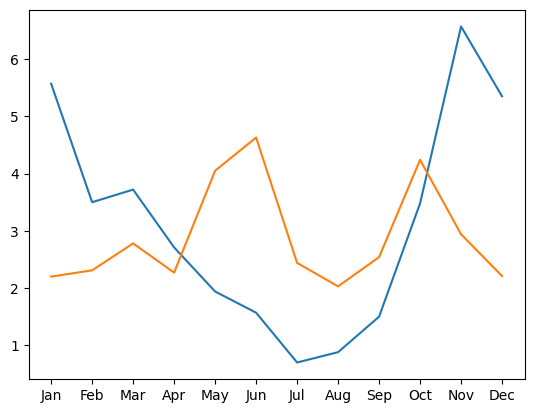

In [3]:
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

### Customizing data appearance

Here several aesthetic settings are altered to make it clear the line plots observe changes from one month to the next (as opposed to being continous) and ensure the distinctiveness of the two plots:

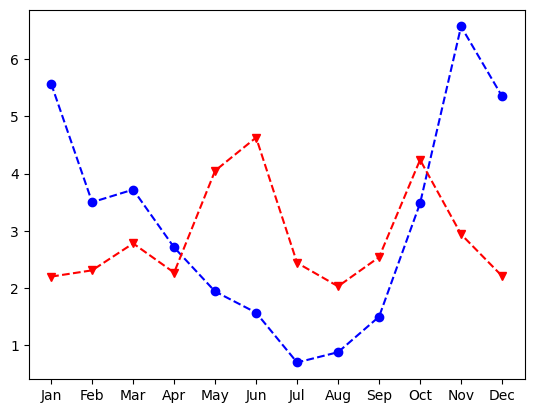

In [4]:
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color='b', marker='o', linestyle='--')
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color='r', marker='v', linestyle='--')

### Creating a grid of subplots

Here's how to create three rows and two columns worth of empty plots to be filled in later:

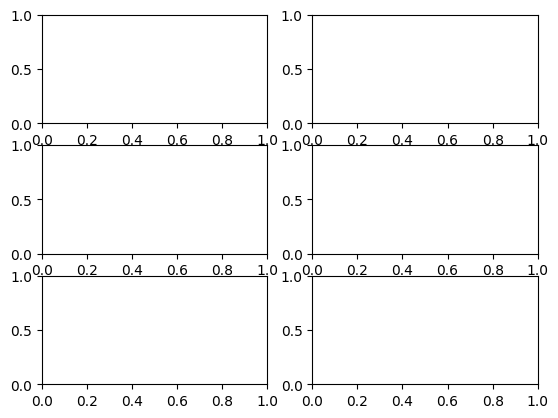

In [5]:
fig, ax = plt.subplots(3, 2)

### Creating small multiples with plt.subplots

Here are some (unlabeled) plots depicting monthly precepitation and average temperature in Seattle and Austin respectively:

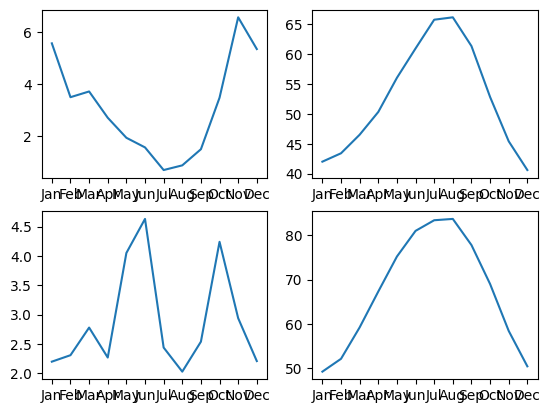

In [6]:
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])

### Small multiples with shared y-axis

Here are two more (unlabeled) plots of the average monthly precipitation in Seattle and Austin, respectively, with dashed lines for the 25th and 75th percentiles above and below and a shared y-axis through `sharey=True` to make sure of apples-to-apples-comparisons:

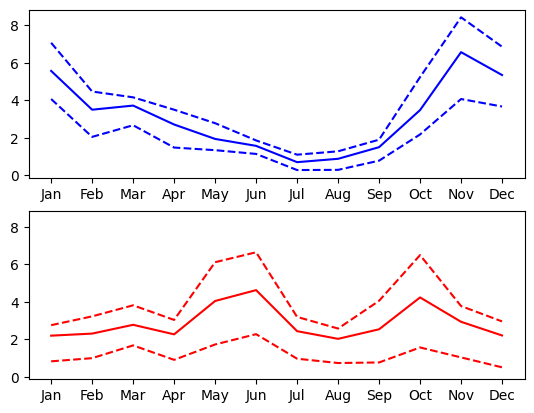

In [7]:
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color='b', linestyle='--')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color='b', linestyle='--')

# Plot Austin precipitation in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color='r', linestyle='--')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color='r', linestyle='--')

## Plotting time series

### Read data with a time index

(Refer to how `climate_change` was loaded in the header)

### Plot time series data

Here it is shown to be possible to use the index of a `DataFrame` as the x-axis of a plot. Because the index is a `DateTimeIndex`, the formatting will be automatic:

Text(0, 0.5, 'Relative temperature (Celsius)')

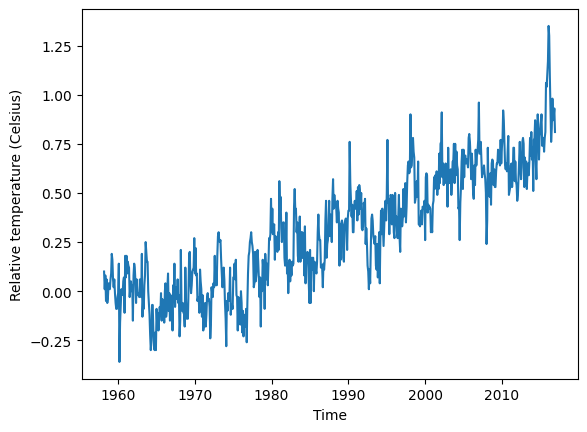

In [8]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['relative_temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Relative temperature (Celsius)')

In [9]:
climate_change.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

### Using a time index to zoom in

Index slicing works much as shown in the Data Manipulation with Pandas course (note the missing value in December 1975):

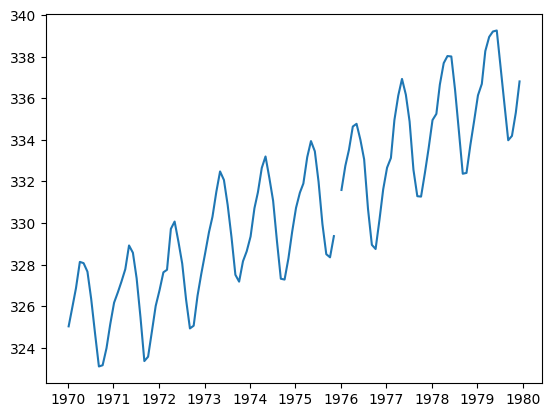

In [10]:
fig, ax = plt.subplots()
seventies = climate_change['1970-01-01':'1979-12-31']
ax.plot(seventies.index, seventies['co2'])

### Plotting two variables

In this example, two plots are made with the same x-axis and two distinct y-axes on the left and right. Color is used to distinguish the two plots:

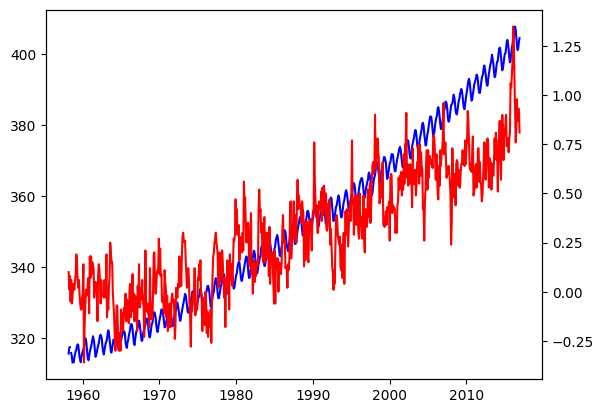

In [11]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['co2'], color='blue')
ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

### Defining a function that plots time-series data

Here the lesson is getting us into the DRY principle:

In [12]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

### Using a plotting function

Here's `plot_timeseries()` in action, plotting `co2` and `relative_temp` with code duplication at a minimum:

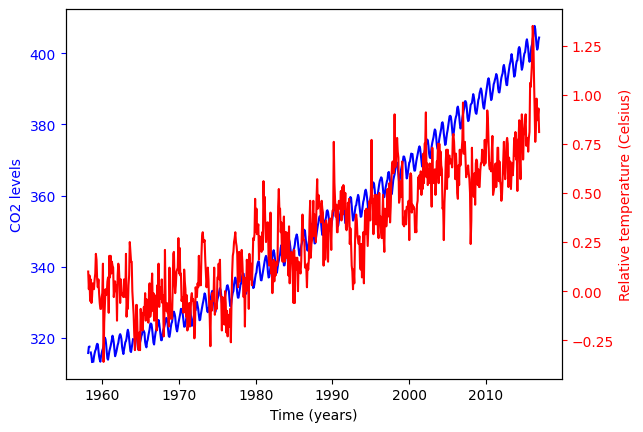

In [13]:
fig, ax = plt.subplots()

plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temperature (Celsius)')

### Annotating a plot of time series data

Here's where things get a little fiddly. The following code attaches text to the time series of relative temperature showing where that time series first exceeded 1° Celsius:

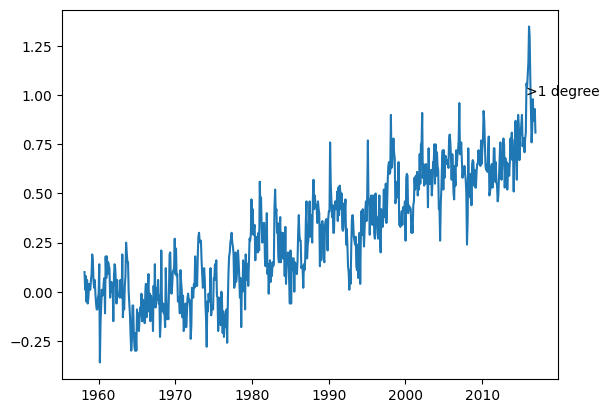

In [14]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change['relative_temp'])
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))
plt.show()

### Plotting time series: putting it all together

The final exercise of the second part shows us how to plot two time series together with color to distinguish them and an arrow pointing to a point of interest on the second time series with text at a suitable distance away to avoid confusing clutter:

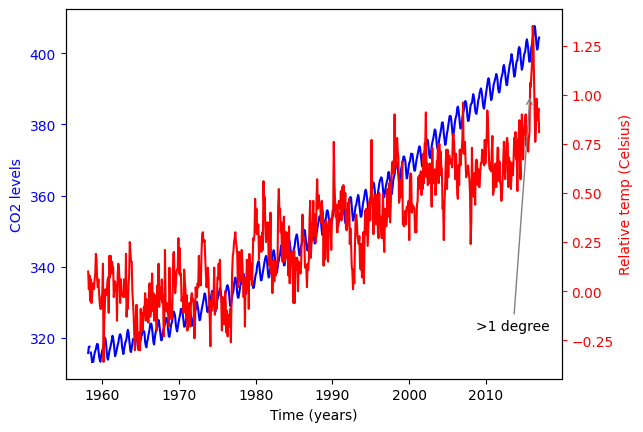

In [15]:
fig, ax = plt.subplots()

plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle': '->', 'color': 'gray'})